# Exercise 7 - (E10.6)

The required modules:

In [1]:
import numpy as np

from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

from utilities.activation_functions import hardlims
from utilities.db_plot import plot_boundaries, contour_boundaries

Let's start by defining some function that will come in handy for predicting and plotting classification outputs. The prediction function:

In [2]:
def predict(Ws: list, Bs: list, p: np.ndarray):
    # Input
    a = p.reshape(-1, 1)

    # Output loop
    for W, B in zip(Ws, Bs):
        a = hardlims(np.dot(W, a) + B)
    return a

The classification plot function:

In [3]:
def classification_plot(W, B, axf):
    # create a grid of x, y values
    x_vals = np.linspace(-3, 3, 1000)
    y_vals = np.linspace(-3, 3, 1000)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Create input matrix
    xy = np.vstack([X.ravel(), Y.ravel()])

    # Calculate function values for each x, y pair
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = predict(W, B, xy[:, i*X.shape[1]+j]).squeeze()

    # Create a contour plot
    contour_boundaries(X, Y, Z, axf)

## Network Diagram

For each given pattern we will be using the same general network structure represented below:<br>
<br>


<div style="text-align:center;">
    <img src="https://i.ibb.co/0qJ1VDz/network-diagram.png" width="90%" height="90%" />
</div>

<br>

Where $S$ is the number of neurons in the first layer (number of rows of $\textbf{W}_1$), and $R$ is that of the second layer (number of rows of $\textbf{W}_2$).

Each layer in the structure has a particular function:
- 1st layer: **Input layer**, in this layer we need to use a number of neurons (i.e. decision boundaries) equal to the number of total sides the given polygons have.
- 2nd layer: **AND layer**, this layer is used to check whether the given input falls inside the boundaries of one of the polygons.
- 3rd layer: **OR layer**, finally the output layer yields 1 if the point is inside one of the polygons, and -1 otherwise.

## Point 1
### First layer
By graphically adjusting the weights and making sure the output of each neuron is $1$ on the polygon side of the decision boundary, we find the following values for the weight matrix and the bias vector:

$$
\begin{equation}
\textbf{W}_1 = \begin{bmatrix}
0 & 1 \\
1 & -1 \\
-1 & 0 \\
0 & 1 \\
1 & -1 \\
-1 & 0
\end{bmatrix}\, , \,\,\,\, \textbf{B}_1 = \begin{bmatrix}
0 \\
1 \\
0 \\
-1 \\
0 \\
2 \\
\end{bmatrix}
\end{equation}
$$

In [4]:
# First triangle
W11 = np.array([[0, 1], [1, -1], [-1, 0]])
b11 = np.array([[0], [1], [0]])

# Second triangle
W21 = np.array([[0, 1], [1, -1], [-1, 0]])
b21 = np.array([[-1], [0], [2]])

# Connect together
W1 = np.vstack((W11, W21))
B1 = np.vstack((b11, b21))

The correctness of the chosen decision boundaries can be graphically checked:

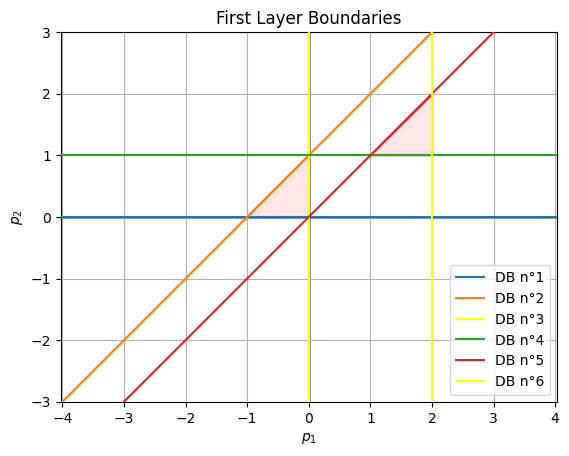

In [5]:
# Create the polygon patch object
polygon1 = Polygon([(0, 0), (0, 1), (-1, 0)], edgecolor='r', facecolor=(1, 0, 0, 0.1))
polygon2 = Polygon([(1, 1), (2, 1), (2, 2)], edgecolor='r', facecolor=(1, 0, 0, 0.1))

# Create a figure and axes objects
_, ax = plt.subplots()

# Add the polygon to the axes
ax.add_patch(polygon1)
ax.add_patch(polygon2)

# Plot boundaries
plot_boundaries(W1, B1, ax)

# Display the plot
plt.title("First Layer Boundaries")
plt.show()

The decision boundaries correctly surround the two triangles.

### Second layer

For the AND layer we need a weight matrix and bias vector that combine the decision boundaries into the polygon shapes, in a way that if a given input resides within one of the polygons, one of the two outputs will be $1$ and the other $-1$, and if the input is not within any of the polygons both outputs will be $-1$. This can be achieved by adopting the following parameters for the second layer:

$$
\begin{equation}
\textbf{W}_2 = \begin{bmatrix}
1 & 1 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 1 & 1 \\
\end{bmatrix}\, , \,\,\,\, \textbf{B}_2 = \begin{bmatrix}
-2 \\
-2
\end{bmatrix}
\end{equation}
$$

In [6]:
# AND layer
W2 = np.array([[1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1]])
B2 = np.array([[-2], [-2]])

### Third layer

Finally, we will need an OR layer to produce an output of $1$ everytime an input falls within the boundaries of one triangle, that is whenever one of the two output of the previous layer is $1$, and $-1$ otherwise. The parameters to do so are reported hereafter:

$$
\begin{equation}
\textbf{W}_3 = \begin{bmatrix}
1 & 1 \\
\end{bmatrix}\, , \,\,\,\, \textbf{B}_3 = \begin{bmatrix}
1\\
\end{bmatrix}
\end{equation}
$$

In [7]:
# OR layer
W3 = np.array([[1, 1]])
B3 = np.array([[1]])

To validate the so-built neural network we can generate a contour plot to check if the shapes of the triangles are correctly reproduced, and the right output value is associated to them:

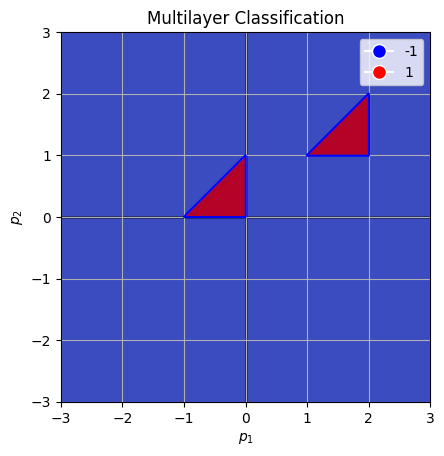

In [8]:
# Create a figure and axes objects
_, ax = plt.subplots()

# Create a contour plot
classification_plot([W1, W2, W3], [B1, B2, B3], ax)

# Display the plot
plt.title("Multilayer Classification")
plt.show()

As can be seen the neural network performs as desired.

## Point 2
### First layer

The same procedure is then repeated here and for the next patterns, with minimal changes that will be pointed out when necessary. The parameters for the first layer in this case are:

$$
\begin{equation}
\textbf{W}_1 = \begin{bmatrix}
0 & 1 \\
-1 & -1 \\
1 & 0 \\
0 & 1 \\
1 & -1 \\
-1 & 0
\end{bmatrix}\, , \,\,\,\, \textbf{B}_1 = \begin{bmatrix}
1 \\
-1 \\
1 \\
0\\
0 \\
1 \\
\end{bmatrix}
\end{equation}
$$

In [9]:
# First triangle
W11 = np.array([[0, 1], [-1, -1], [1, 0]])
b11 = np.array([[1], [-1], [1]])

# Second triangle
W21 = np.array([[0, 1], [1, -1], [-1, 0]])
b21 = np.array([[0], [0], [1]])

# Connect together
W1 = np.vstack((W11, W21))
B1 = np.vstack((b11, b21))

The plot of the decision boundaries:

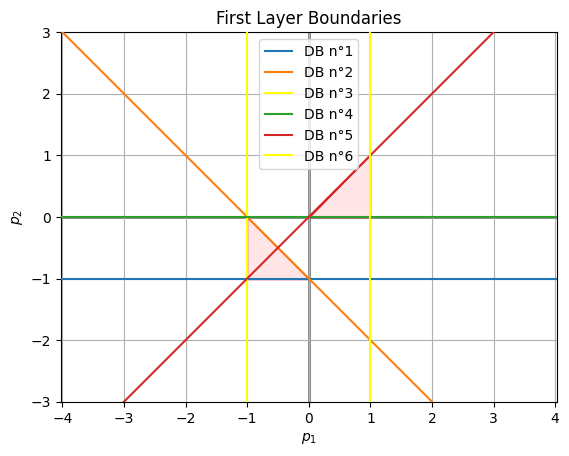

In [10]:
# Create the polygon patch object
polygon1 = Polygon([(-1, 0), (-1, -1), (0, -1)], edgecolor='r', facecolor=(1, 0, 0, 0.1))
polygon2 = Polygon([(0, 0), (1, 0), (1, 1)], edgecolor='r', facecolor=(1, 0, 0, 0.1))

# Create a figure and axes objects
_, ax = plt.subplots()

# Add the polygon to the axes
ax.add_patch(polygon1)
ax.add_patch(polygon2)

# Plot boundaries
plot_boundaries(W1, B1, ax)

# Display the plot
plt.title("First Layer Boundaries")
plt.show()

### Second layer

The parameters for the AND layer are the same as the previous pattern:

$$
\begin{equation}
\textbf{W}_2 = \begin{bmatrix}
1 & 1 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 1 & 1 \\
\end{bmatrix}\, , \,\,\,\, \textbf{B}_2 = \begin{bmatrix}
-2 \\
-2
\end{bmatrix}
\end{equation}
$$

In [11]:
# AND layer
W2 = np.array([[1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1]])
B2 = np.array([[-2], [-2]])

### Third layer

Similarly, for the OR layer:

$$
\begin{equation}
\textbf{W}_3 = \begin{bmatrix}
1 & 1 \\
\end{bmatrix}\, , \,\,\,\, \textbf{B}_3 = \begin{bmatrix}
1\\
\end{bmatrix}
\end{equation}
$$

In [12]:
# OR layer
W3 = np.array([[1, 1]])
B3 = np.array([[1]])

The contour can be plotted similarly:

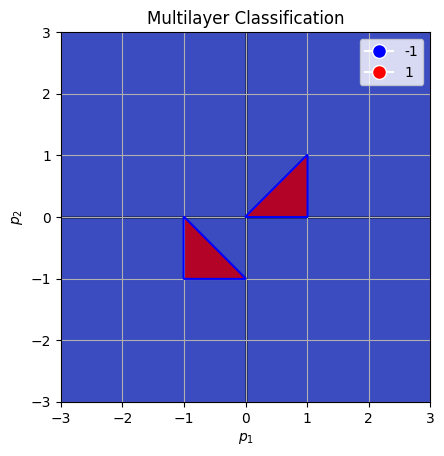

In [13]:
# Create a figure and axes objects
_, ax = plt.subplots()

# Create a contour plot
classification_plot([W1, W2, W3], [B1, B2, B3], ax)

# Display the plot
plt.title("Multilayer Classification")
plt.show()

## Point 3
### First layer

The parameters for the first layer in this case are:

$$
\begin{equation}
\textbf{W}_1^T = \begin{bmatrix}
1 & -1 & 0 & 1 & -1 & -1 & -1 & 1 & -1 & 1 \\
-1 & -1 & 1 & 0 & 1 & -1 & 1 & 1 & -1 & -1
\end{bmatrix}\, , \,\,\,\, \textbf{B}_1^T = \begin{bmatrix}
-1 & 1 & 1 & 2 & -1 & -1 & 0 & 0 & 2 & 2
\end{bmatrix}
\end{equation}
$$

In [14]:
# First triangle
W11 = np.array([[-1, 1], [-1, -1], [1, 0]])
b11 = np.array([[-1], [1], [1]])

# Second triangle
W21 = np.array([[0, 1], [1, -1], [-1, -1]])
b21 = np.array([[2], [-1], [-1]])

# Square
W31 = np.array([[1, -1], [1, 1], [-1, -1], [-1, 1]])
b31 = np.array([[0], [0], [2], [2]])

# Connect together
W1 = np.vstack((W11, W21, W31))
B1 = np.vstack((b11, b21, b31))

Similarly, the decision boundaries:

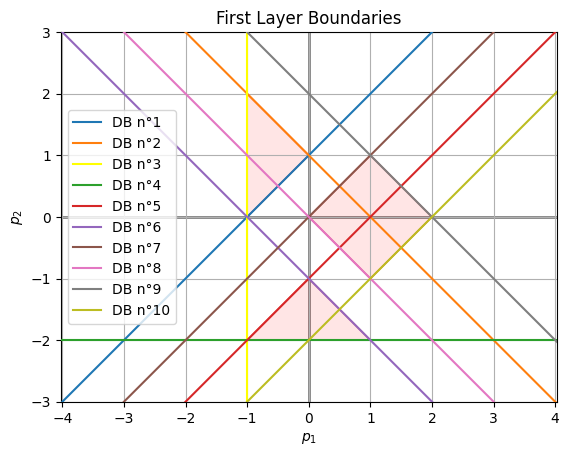

In [15]:
# Create the polygon patch object
polygon1 = Polygon([(-1, 0), (0, 1), (-1, 2)], edgecolor='r', facecolor=(1, 0, 0, 0.1))
polygon2 = Polygon([(0, 0), (1, 1), (2, 0), (1, -1)], edgecolor='r', facecolor=(1, 0, 0, 0.1))
polygon3 = Polygon([(0, -1), (1, -2), (-1, -2)], edgecolor='r', facecolor=(1, 0, 0, 0.1))

# Create a figure and axes objects
_, ax = plt.subplots()

# Add the polygon to the axes
ax.add_patch(polygon1)
ax.add_patch(polygon2)
ax.add_patch(polygon3)

# Plot boundaries
plot_boundaries(W1, B1, ax)

# Display the plot
plt.title("First Layer Boundaries")
plt.show()

### Second layer

The parameters for the AND layer:

$$
\begin{equation}
\textbf{W}_2 = \begin{bmatrix}
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1
\end{bmatrix}\, , \,\,\,\, \textbf{B}_2 = \begin{bmatrix}
-2 \\
-2 \\
-3
\end{bmatrix}
\end{equation}
$$

In [16]:
# AND layer
W2 = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])
B2 = np.array([[-2], [-2], [-3]])

### Third layer

The parameters for the OR layer:

$$
\begin{equation}
\textbf{W}_3 = \begin{bmatrix}
1 & 1 & 1\\
\end{bmatrix}\, , \,\,\,\, \textbf{B}_3 = \begin{bmatrix}
2\\
\end{bmatrix}
\end{equation}
$$

In [17]:
# OR layer
W3 = np.array([[1, 1, 1]])
B3 = np.array([[2]])

Finally, the contour plot:

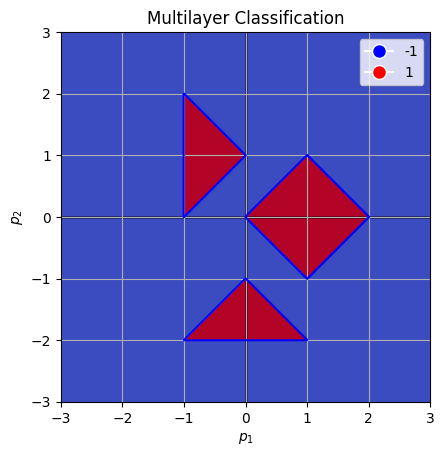

In [18]:
# Create a figure and axes objects
_, ax = plt.subplots()

# Create a contour plot
classification_plot([W1, W2, W3], [B1, B2, B3], ax)

# Display the plot
plt.title("Multilayer Classification")
plt.show()

## Point 4
### First layer

The parameters for the first layer in this case are:

$$
\begin{equation}
\textbf{W}_1 = \begin{bmatrix}
0 & -1 \\
0.5 & 1 \\
-1 & -1 \\
1 & -1 \\
-1 & 0.5 \\
1 & 0
\end{bmatrix}\, , \,\,\,\, \textbf{B}_1 = \begin{bmatrix}
1 \\
0 \\
0 \\
-1 \\
1.5 \\
-1
\end{bmatrix}
\end{equation}
$$

In [19]:
# First triangle
W11 = np.array([[0, -1], [0.5, 1], [-1, -1]])
b11 = np.array([[1], [0], [0]])

# Second triangle
W21 = np.array([[1, -1], [-1, 0.5], [1, 0]])
b21 = np.array([[-1], [1.5], [-1]])

# Connect together
W1 = np.vstack((W11, W21))
B1 = np.vstack((b11, b21))

The decision boundaries:

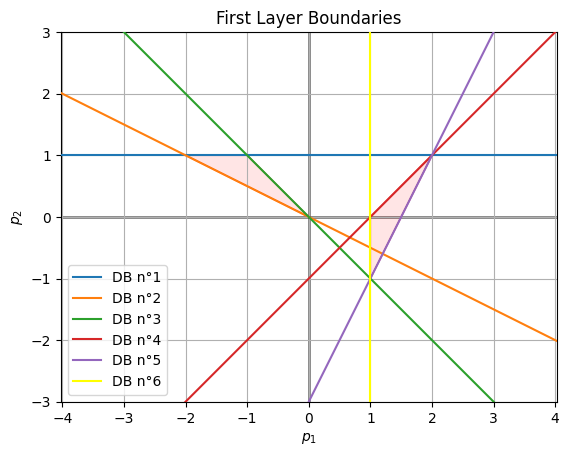

In [20]:
# Create the polygon patch object
polygon1 = Polygon([(0, 0), (-2, 1), (-1, 1)], edgecolor='r', facecolor=(1, 0, 0, 0.1))
polygon2 = Polygon([(1, 0), (2, 1), (1, -1)], edgecolor='r', facecolor=(1, 0, 0, 0.1))

# Create a figure and axes objects
_, ax = plt.subplots()

# Add the polygon to the axes
ax.add_patch(polygon1)
ax.add_patch(polygon2)

# Plot boundaries
plot_boundaries(W1, B1, ax)

# Display the plot
plt.title("First Layer Boundaries")
plt.show()

### Second layer

The parameters for the AND layer are:


$$
\begin{equation}
\textbf{W}_2 = \begin{bmatrix}
1 & 1 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 1 & 1 \\
\end{bmatrix}\, , \,\,\,\, \textbf{B}_2 = \begin{bmatrix}
-2 \\
-2
\end{bmatrix}
\end{equation}
$$

In [21]:
# AND layer
W2 = np.array([[1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1]])
B2 = np.array([[-2], [-2]])

### Third layer

The parameters for the OR layer:

$$
\begin{equation}
\textbf{W}_3 = \begin{bmatrix}
1 & 1\\
\end{bmatrix}\, , \,\,\,\, \textbf{B}_3 = \begin{bmatrix}
1\\
\end{bmatrix}
\end{equation}
$$

In [22]:
# OR layer
W3 = np.array([[1, 1]])
B3 = np.array([[1]])

Finally, the contour plot:

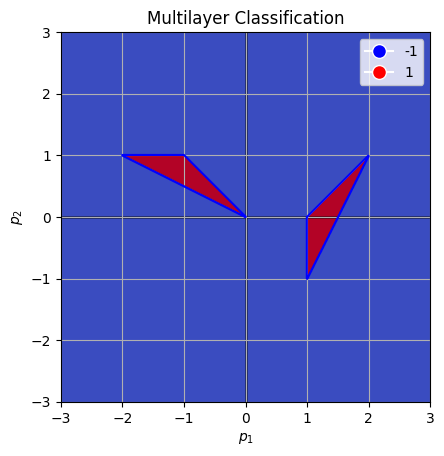

In [23]:
# Create a figure and axes objects
_, ax = plt.subplots()

# Create a contour plot
classification_plot([W1, W2, W3], [B1, B2, B3], ax)

# Display the plot
plt.title("Multilayer Classification")
plt.show()